# Titanic Data Set
https://www.kaggle.com/c/titanic/

In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

In [2]:
import pandas as pd

df = pd.read_csv('../datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis exploratorio

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- El conjunto de entrenamiento tiene 891 ejemplos y 11 características + la variable objetivo (Survived). 
- 2 de las features son float, 5 son int y 5 son objetos(string). 

### Desbalanceo de clases

<AxesSubplot:xlabel='Survived', ylabel='count'>

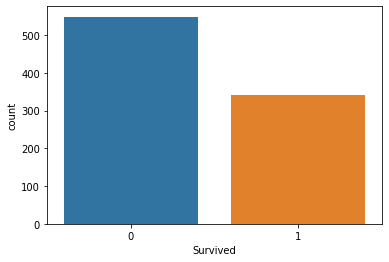

In [6]:
sns.countplot(x='Survived', data=df)

### Exploración de las variables

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

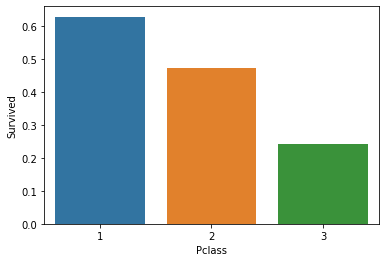

In [7]:
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)

> Los pasajeros de primera clase, sobrevivieron más

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

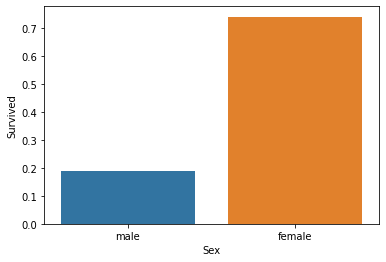

In [8]:
sns.barplot(x ='Sex', y='Survived', data=df, ci=None)

> Las mujeres sobrevivieron más

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

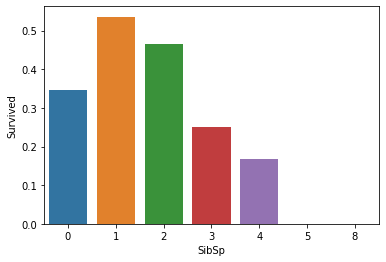

In [9]:
sns.barplot(x="SibSp", y="Survived", data=df, ci=None)

> Los pasajeros con uno o dos acompañantes sobrevivieron más

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

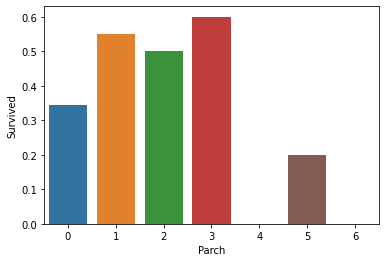

In [10]:
sns.barplot(x="Parch", y="Survived", data=df, ci=None)

> Los pasajeros con 1-3 hijos sobrevivieron más

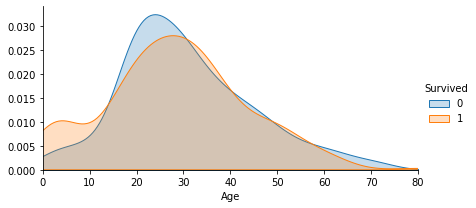

In [11]:
age = sns.FacetGrid(df, hue="Survived",aspect=2)
age.map(sns.kdeplot,'Age',shade= True)
age.set(xlim=(0, df['Age'].max()))
age.add_legend()

> Los pasajeros jóvenes sobrevivieron más

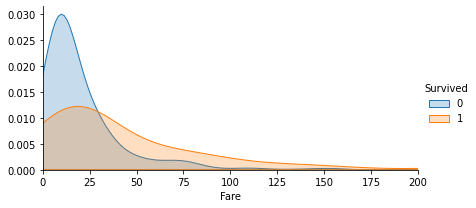

In [12]:
fare = sns.FacetGrid(df, hue="Survived",aspect=2)
fare.map(sns.kdeplot,'Fare',shade= True)
fare.set(xlim=(0, 200))
fare.add_legend()

> Los pasajeros que pagaron más, sobrevivieron más

## Preprocesamiento de los datos

### Valores nulos

In [13]:
total = df.isnull().sum().sort_values(ascending=False)

percent_1 = round(df.isnull().sum()/df.isnull().count()*100, 1).sort_values(ascending=False)

missing_data = pd.concat([total, percent_1], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


- La feature `Embarked` tiene solo 2 valores nulos, por lo que se pueden completar fácilmente. 
- La feature `Age` se presenta más complicada, ya que tiene 177 valores nulos. 
- La `Cabin` necesita más investigación, pero parece que podríamos querer eliminarla del conjunto de datos, ya que falta el 77%.

**Embarked**

Como solo tiene 2 valores nulos, los rellenaremos con el más común

In [14]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')

df['Embarked'] = imp.fit_transform(df)
df["Embarked"].isnull().sum()

0

**Age**

En este caso crearemos una matriz que contenga números aleatorios, que se calculen en función del valor de la media de la edad y la desviación estándar.

<AxesSubplot:>

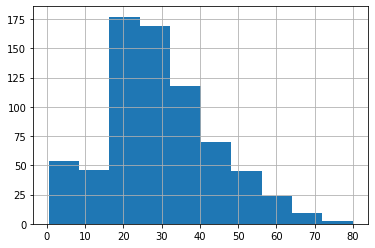

In [15]:
df.Age.hist()

In [16]:
mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()

# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# fill NaN values in Age column with random values generated
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age

df["Age"] = age_slice
df["Age"] = df["Age"].astype(int)

df["Age"].isnull().sum()

0

**Cabin**

In [17]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Vemos que la variable `Cabin` empieza por una letra que, investigando, representa la cubierta en la que se alojaban los pasajeros. Como puede ser interesante, podemos quedarnos solo con la letra y rellenar con otra letra inventada los valores que faltan para quitarnos los nulos

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

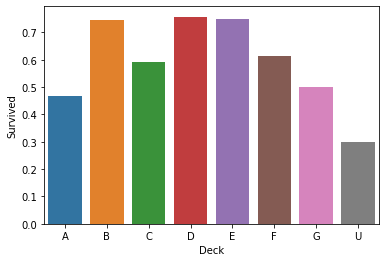

In [18]:
df['Cabin'] = df['Cabin'].fillna("U")
df['Deck'] = df['Cabin'].map(lambda x: x[0])

sns.barplot(x="Deck", y="Survived", data=df, ci=None, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U'])

Ahora podemos borrar el feature `Cabin` ya que es redundante con `Deck`

In [19]:
# we can now drop the cabin feature
df = df.drop(['Cabin'], axis=1)
df["Deck"].isnull().sum()

0

### Detección de outliers

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.296296,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.574173,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age'>

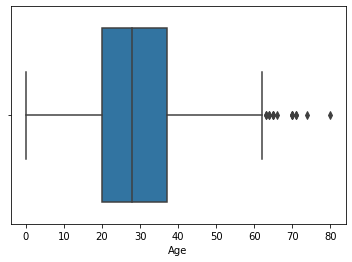

In [21]:
sns.boxplot(x='Age', data=df)

<AxesSubplot:xlabel='Fare'>

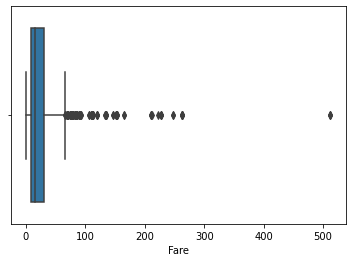

In [22]:
sns.boxplot(x='Fare', data=df)

Como veíamos en la teoría:
> Un valor atípico (outlier) es un valor de una variable muy distante a otras observaciones de la misma variable
- Errores en los instrumentos de medida
- Picos aleatorios en una variable
- La distribución tiene una cola muy “pesada” (heavily-tailed distribution)
    - **Cuidado con hacer asunciones sobre la normalidad de la distribución**

<AxesSubplot:>

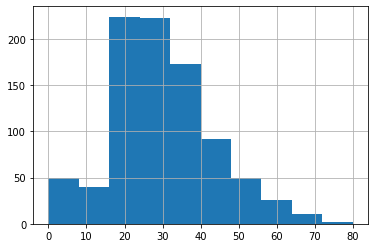

In [23]:
df.Age.hist()

<AxesSubplot:>

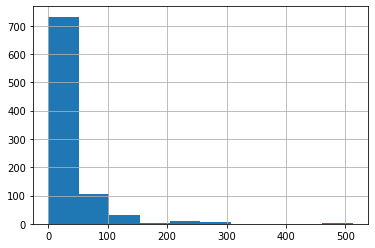

In [24]:
df.Fare.hist()

### Distintos órdenes de magnitud

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,3,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,4,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,5,U


> Las dos variables numéricas del dataset son `Age` y `Fare`. Ambas están en distintos órdenes de magnitud, así que vamos a normalizarlos

In [26]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l1')
ageAndFare = df[["Age", "Fare"]]

ageAndFare = scaler.fit_transform(ageAndFare)
ageAndFare = pd.DataFrame(ageAndFare, columns = ["age", "fare"])
df['NAge'] = ageAndFare[['age']]
df['NFare'] = ageAndFare[['fare']]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,NAge,NFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,U,0.752137,0.247863
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,C,0.347720,0.652280
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,3,U,0.766396,0.233604
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,4,C,0.397276,0.602724
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,5,U,0.813008,0.186992


### Datos categóricos

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,NAge,NFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,U,0.752137,0.247863
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,C,0.347720,0.652280
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,3,U,0.766396,0.233604
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,4,C,0.397276,0.602724
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,5,U,0.813008,0.186992


Tenemos como datos categóricos: `Sex` & `Deck`

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Deck'] = le.fit_transform(df['Deck'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,NAge,NFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,8,0.752137,0.247863
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,2,0.347720,0.652280
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,3,8,0.766396,0.233604
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,4,2,0.397276,0.602724
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,5,8,0.813008,0.186992


In [29]:
le_sex = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,NAge,NFare
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,1,8,0.752137,0.247863
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,2,2,0.347720,0.652280
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,3,8,0.766396,0.233604
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,4,2,0.397276,0.602724
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,5,8,0.813008,0.186992


## Selección de variables

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,NAge,NFare
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,1,8,0.752137,0.247863
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,2,2,0.347720,0.652280
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,3,8,0.766396,0.233604
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,4,2,0.397276,0.602724
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,5,8,0.813008,0.186992


Primero eliminamos las variables de identificadores, ya que no aportan nada al modelo

In [31]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Age'], 1, inplace =True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Deck,NAge,NFare
0,0,3,1,1,0,1,8,0.752137,0.247863
1,1,1,0,1,0,2,2,0.347720,0.652280
2,1,3,0,0,0,3,8,0.766396,0.233604
3,1,1,0,1,0,4,2,0.397276,0.602724
4,0,3,1,0,0,5,8,0.813008,0.186992


<AxesSubplot:>

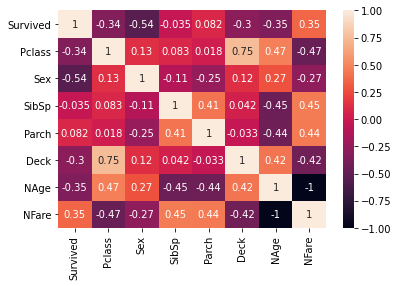

In [32]:
sns.heatmap(df.corr(), annot=True, cbar=True)

## Entrenamiento de los modelos

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

def show_metrics(clf, y_test, y_pred):
    print(f'Accuracy score: {int(accuracy_score(y_test, y_pred)*100)}%\n')
    print(classification_report(y_test, y_pred))
    
    disp = plot_confusion_matrix(clf, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()

### Regresión logística

Accuracy score: 79%

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



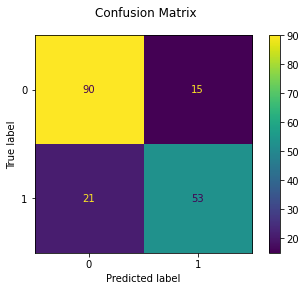

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

show_metrics(logreg, y_test, y_pred)

In [36]:
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(solver='liblinear')
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring = "accuracy")

print("Accuracy Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Accuracy Scores: [0.86111111 0.73611111 0.71830986 0.94366197 0.83098592 0.70422535
 0.76056338 0.70422535 0.76056338 0.90140845]
Mean: 0.7921165884194052
Standard Deviation: 0.08197974057260625


### Naïve Bayes

Accuracy score: 77%

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.74      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



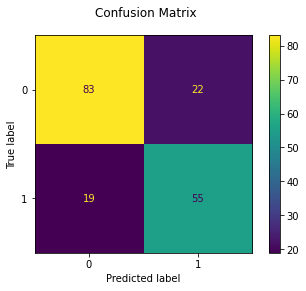

In [37]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)  

show_metrics(gaussian, y_test, y_pred)

In [38]:
from sklearn.model_selection import cross_val_score

gaussian = GaussianNB() 
scores = cross_val_score(gaussian, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.84722222 0.76388889 0.67605634 0.87323944 0.77464789 0.76056338
 0.77464789 0.74647887 0.67605634 0.81690141]
Mean: 0.7709702660406885
Standard Deviation: 0.060980036625581026


### Decision tree

Accuracy score: 76%

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       105
           1       0.74      0.66      0.70        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



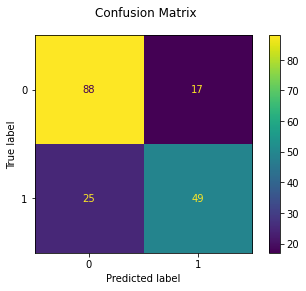

In [39]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)  

show_metrics(decision_tree, y_test, y_pred)

In [40]:
from sklearn.model_selection import cross_val_score

decision_tree = DecisionTreeClassifier() 
scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79166667 0.68055556 0.67605634 0.78873239 0.67605634 0.74647887
 0.6056338  0.78873239 0.69014085 0.83098592]
Mean: 0.7275039123630673
Standard Deviation: 0.06813916904673702


### Random Forest

Accuracy score: 79%

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.82      0.64      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



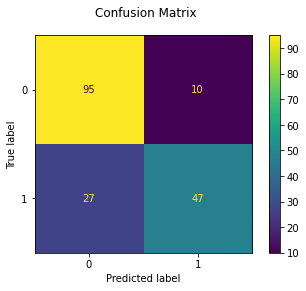

In [80]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

show_metrics(random_forest, y_test, y_pred)

In [42]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.79166667 0.76056338 0.88732394 0.8028169  0.74647887
 0.71830986 0.78873239 0.73239437 0.90140845]
Mean: 0.7963028169014084
Standard Deviation: 0.058950370334527775


In [81]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.236
NAge,0.191
NFare,0.188
Embarked,0.181
Pclass,0.066
Deck,0.059
SibSp,0.050
Parch,0.030


<AxesSubplot:xlabel='feature'>

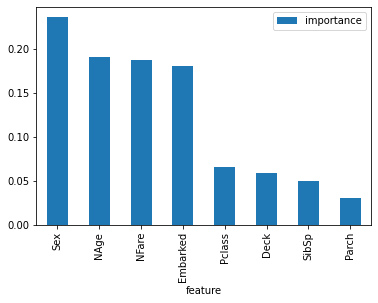

In [82]:
importances.plot.bar()

### Support Vector Machine

Accuracy score: 78%

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


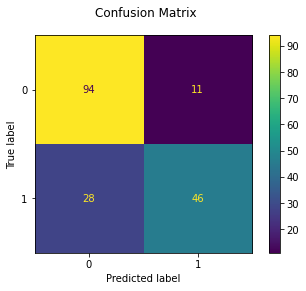

In [45]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC(max_iter=1000000)
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

show_metrics(random_forest, y_test, y_pred)

In [46]:
from sklearn.model_selection import cross_val_score

linear_svc = LinearSVC()
scores = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/alicia/workspace/e

Scores: [0.76388889 0.63888889 0.64788732 0.84507042 0.61971831 0.56338028
 0.76056338 0.50704225 0.69014085 0.46478873]
Mean: 0.6501369327073553
Standard Deviation: 0.11320181855056077


/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/alicia/workspace/e

### K Nearest Neighbor

Accuracy score: 60%

              precision    recall  f1-score   support

           0       0.61      0.90      0.73       105
           1       0.56      0.19      0.28        74

    accuracy                           0.60       179
   macro avg       0.59      0.54      0.50       179
weighted avg       0.59      0.60      0.54       179



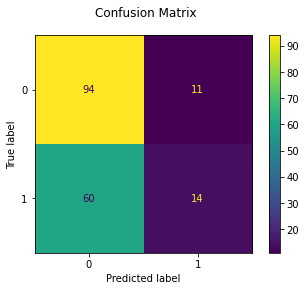

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 9) 
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

show_metrics(knn, y_test, y_pred)

In [48]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 9) 
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.625      0.59722222 0.56338028 0.57746479 0.54929577 0.6056338
 0.53521127 0.6056338  0.6056338  0.56338028]
Mean: 0.5827856025039123
Standard Deviation: 0.027790145806162864


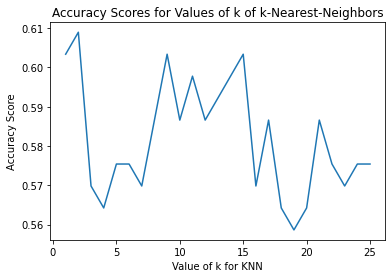

In [49]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()